<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/NeuralNetwork_from_scratch(single_LinearRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

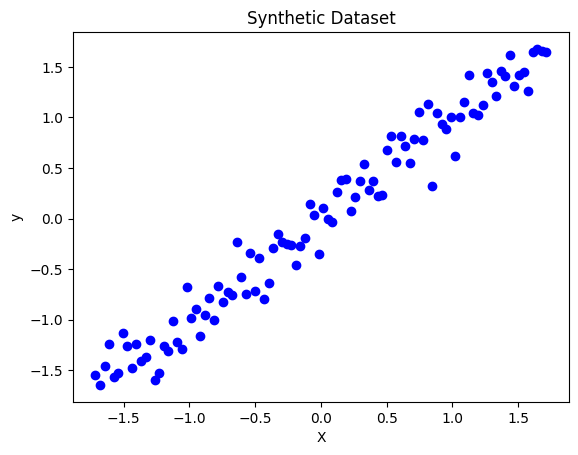

In [54]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) #seed for reproducibility

X=np.linspace(0,10,100).reshape(-1,1) #creating synthetic data of 100 rows and 1 column
y=5*X+1+np.random.randn(100,1)*3 #here 3 is the added noise

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

plt.scatter(X,y,color='blue')
plt.title("Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [55]:
#initialize the layer size, weights and bias

input_size=1
hidden_size=4
output_size=1

Wxh=np.random.randn(input_size, hidden_size)*0.01
bh=np.zeros((1,hidden_size))

Why=np.random.randn(hidden_size,output_size)*0.01
by=np.zeros((1,output_size))


In [56]:
#defining the hyperparamters
lr=0.01
epoch=10000

In [57]:
#activation fn
def relu(a1):
  return np.maximum(0,a1)
#forward pass fn
def forward_pass(X,Wxh,bh,Why,by):
  z1=X @ Wxh + bh
  a1=relu(z1)
  z2=a1 @ Why +by
  return z1,a1,z2
#loss computing fn
def loss(y_pred,y):
  return np.mean((y_pred-y)**2)
#derivative of relu for backpropagation
def relu_derivative(z):
  return (z>0).astype(float)

In [58]:
for e in range(epoch):
  z1,a1,y_pred=forward_pass(X,Wxh,bh,Why,by) # forward pass

  compute_loss=loss(y_pred,y) # loss calculation

  # backpropagation
  dLdz2 = 2*(y_pred-y)/y.shape[0] #derivative of loss (MSE)-This gives the direction to move the predictions to reduce loss

  dLdWhy= a1.T @ dLdz2 # dL/dz2 @ dz2/dwhy
  # a1.T tells how active its corresponding neuron
  # dl/dz2 tells how much neurons output contributed to the output loss

  dLby = np.sum(dLdz2,axis=0,keepdims=True)

  dLda1 = dLdz2 @ Why.T # navigating backward from the loss to the output of hidden layer

  dLdz1 = dLda1 * relu_derivative(z1)
  dLdwxh = X.T @dLdz1
  dLbxh = np.sum(dLdz1,axis=0,keepdims=True)


  #update weight and bias
  Wxh -= lr*dLdwxh
  bh -=lr*dLbxh
  Why -=lr*dLdWhy
  by -=lr*dLby

  if e%1000==0:
    print(f"Epoch:{e} Loss:{compute_loss}")


Epoch:0 Loss:1.0000713181068925
Epoch:1000 Loss:0.05068976903118465
Epoch:2000 Loss:0.03421116725528459
Epoch:3000 Loss:0.033503945399876695
Epoch:4000 Loss:0.0332826276768114
Epoch:5000 Loss:0.03296504949562899
Epoch:6000 Loss:0.032794658303406644
Epoch:7000 Loss:0.03276263693985733
Epoch:8000 Loss:0.03274498394139814
Epoch:9000 Loss:0.03274279126998962


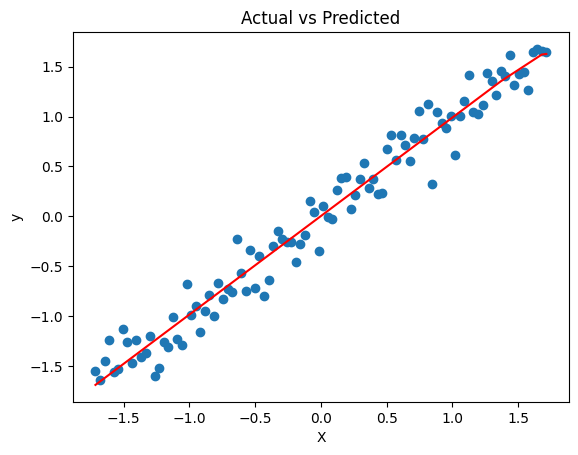

In [59]:
#visualizing actual vs predicted value
_,_,y_pred=forward_pass(X,Wxh,bh,Why,by)
plt.scatter(X,y,label=True)
plt.plot(X,y_pred,label=True,color='red')
plt.title("Actual vs Predicted")
plt.xlabel('X')
plt.ylabel('y')
plt.show()